This notebook contains an example for how to use the `taxbrain` python package

In [1]:
from taxbrain import TaxBrain, differences_plot, distribution_plot

In [2]:
reform_url = "https://raw.githubusercontent.com/PSLmodels/Tax-Calculator/master/taxcalc/reforms/Larson2019.json"
start_year = 2021
end_year = 2030

# Static Reform

After importing the `TaxBrain` class from the `taxbrain` package, we initiate an instance of the class by specifying the start and end year of the anlaysis, which microdata to use, and a policy reform. Additional arguments can be used to specify econoimc assumptions and individual behavioral elasticites.

Once the class has been initiated, the `run()` method will handle executing each model

In [3]:
tb_static = TaxBrain(start_year, end_year, use_cps=True, reform=reform_url)
tb_static.run()

Once the calculators have been run, you can produce a number of tables, including a weighted total of a given variable each year under both current law and the user reform.

In [4]:
print("Combined Tax Liability Over the Budget Window")
tb_static.weighted_totals("combined")

Combined Tax Liability Over the Budget Window


2021          2022          2023          2024  \
Base        2.271315e+12  3.067829e+12  3.246660e+12  3.395741e+12   
Reform      2.328361e+12  3.146043e+12  3.342355e+12  3.509862e+12   
Difference  5.704648e+10  7.821354e+10  9.569515e+10  1.141207e+11   

                    2025          2026          2027          2028  \
Base        3.575933e+12  3.979720e+12  4.161644e+12  4.344157e+12   
Reform      3.710031e+12  4.126731e+12  4.329945e+12  4.534786e+12   
Difference  1.340978e+11  1.470101e+11  1.683017e+11  1.906294e+11   

                    2029          2030  
Base        4.543405e+12  4.749710e+12  
Reform      4.744460e+12  4.961584e+12  
Difference  2.010547e+11  2.118738e+11

If you are interested in a detailed look on the reform's effect, you can produce a differences table for a given year.

In [5]:
print("Differences Table")
tb_static.differences_table(start_year, "weighted_deciles", "combined")

Differences Table


count    tax_cut   perc_cut     tax_inc   perc_inc          mean  \
0-10n     0.102049   0.000000   0.000000    0.035165  34.458500      8.218450   
0-10z     8.390627   0.000000   0.000000    0.000000   0.000000      0.000000   
0-10p    12.214010   0.000000   0.000000    5.510201  45.113777      3.693061   
10-20    20.708304   0.000000   0.000000   15.031974  72.589110     17.199754   
20-30    20.706921   0.019010   0.091803   13.230015  63.891753     27.007745   
30-40    20.707534   0.259493   1.253135   11.850040  57.225744     29.340902   
40-50    20.706181   1.026022   4.955149   12.904516  62.322051     27.858098   
50-60    20.708634   2.988466  14.431013   12.852511  62.063539    -36.682205   
60-70    20.707540   3.812725  18.412256   12.691828  61.290851   -155.371271   
70-80    20.705701   4.045475  19.537975   13.337835  64.416242   -199.030473   
80-90    20.709850   4.421863  21.351497   14.297523  69.037307   -428.662224   
90-100   20.708024   1.431391   6.912254   17.352383  83.795459   3470.938895   
ALL     207.075375  18.004445   8.694633  129.093991  62.341546    275.486531   
90-95    10.354203   1.292340  12.481311    8.241434  79.595059   -299.507547   
95-99     8.282277   0.139051   1.678898    7.283324  87.938673    318.526119   
Top 1%    2.071544   0.000000   0.000000    1.827625  88.225265  34920.482300   

        tot_change  share_of_change  ubi  benefit_cost_total  \
0-10n     0.000839         0.001470  0.0                 0.0   
0-10z     0.000000         0.000000  0.0                 0.0   
0-10p     0.045107         0.079071  0.0                 0.0   
10-20     0.356178         0.624364  0.0                 0.0   
20-30     0.559247         0.980336  0.0                 0.0   
30-40     0.607578         1.065057  0.0                 0.0   
40-50     0.576835         1.011166  0.0                 0.0   
50-60    -0.759638        -1.331613  0.0                 0.0   
60-70    -3.217357        -5.639887  0.0                 0.0   
70-80    -4.121066        -7.224049  0.0                 0.0   
80-90    -8.877530       -15.561926  0.0                 0.0   
90-100   71.876285       125.996010  0.0                 0.0   
ALL      57.046477       100.000000  0.0                 0.0   
90-95    -3.101162        -5.436202  0.0                 0.0   
95-99     2.638122         4.624513  0.0                 0.0   
Top 1%   72.339325       126.807699  0.0                 0.0   

        benefit_value_total  pc_aftertaxinc  
0-10n                   0.0        0.006305  
0-10z                   0.0        0.000000  
0-10p                   0.0       -0.030271  
10-20                   0.0       -0.049706  
20-30                   0.0       -0.047443  
30-40                   0.0       -0.036806  
40-50                   0.0       -0.014259  
50-60                   0.0        0.110990  
60-70                   0.0        0.261920  
70-80                   0.0        0.271875  
80-90                   0.0        0.417652  
90-100                  0.0       -1.292600  
ALL                     0.0       -0.321131  
90-95                   0.0        0.257404  
95-99                   0.0       -0.070457  
Top 1%                  0.0       -4.338197

TaxBrain comes with two (and counting) built in plots as well

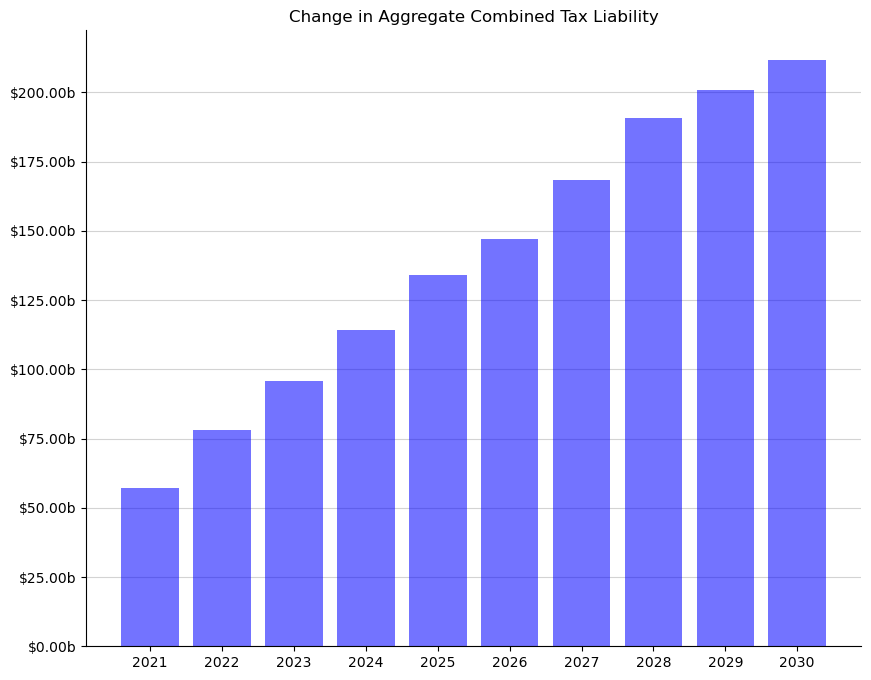

In [6]:
differences_plot(tb_static, 'combined', figsize=(10, 8));

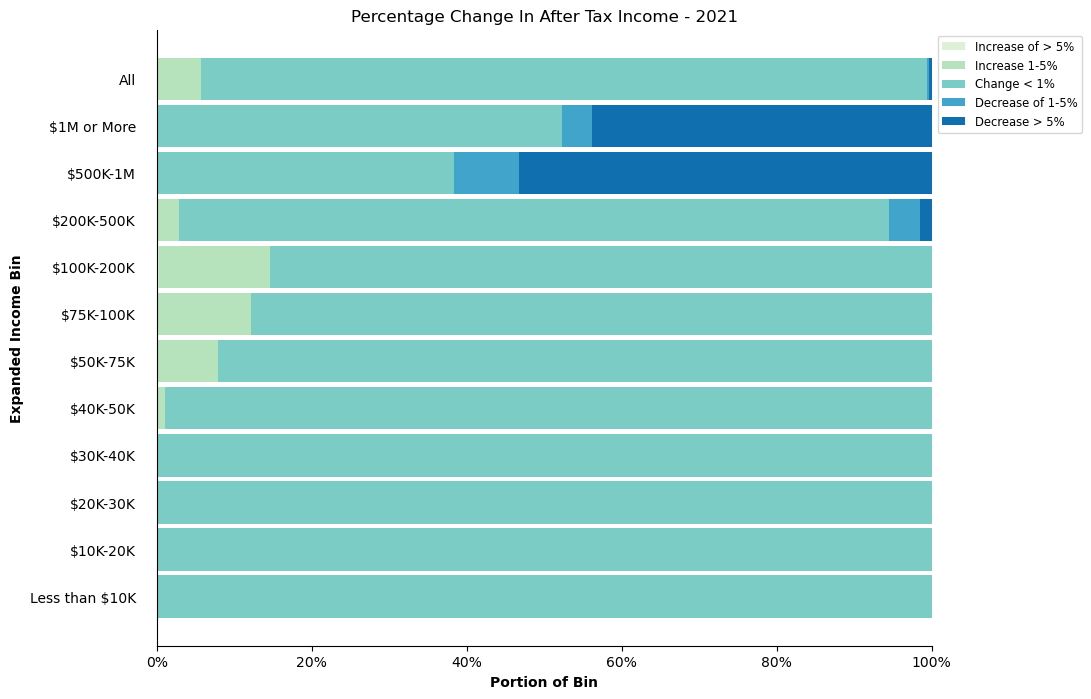

In [7]:
distribution_plot(tb_static, 2021, figsize=(10, 8));

You can run a partial-equlibrium dynamic simulation by initiating the TaxBrian instance exactly as you would for the static reform, but with your behavioral assumptions specified

In [8]:
tb_dynamic = TaxBrain(start_year, end_year, use_cps=True, reform=reform_url,
                      behavior={"sub": 0.25})
tb_dynamic.run()

Once that finishes running, we can produce the same weighted total table as we did with the static run.

In [9]:
print("Partial Equilibrium - Combined Tax Liability")
tb_dynamic.weighted_totals("combined")

Partial Equilibrium - Combined Tax Liability


2021          2022          2023          2024  \
Base        2.271315e+12  3.067829e+12  3.246660e+12  3.395741e+12   
Reform      2.309368e+12  3.119490e+12  3.312328e+12  3.476846e+12   
Difference  3.805276e+10  5.166050e+10  6.566857e+10  8.110481e+10   

                    2025          2026          2027          2028  \
Base        3.575933e+12  3.979720e+12  4.161644e+12  4.344157e+12   
Reform      3.673556e+12  4.082938e+12  4.282362e+12  4.483176e+12   
Difference  9.762328e+10  1.032177e+11  1.207188e+11  1.390191e+11   

                    2029          2030  
Base        4.543405e+12  4.749710e+12  
Reform      4.690509e+12  4.904597e+12  
Difference  1.471038e+11  1.548868e+11

Or we can produce a distribution table to see details on the effects of the reform.

In [10]:
print("Distribution Table")
tb_dynamic.distribution_table(start_year, "weighted_deciles", "expanded_income", "reform")

Distribution Table


count        c00100  count_StandardDed     standard  \
0-10n     0.102049     -7.647952           0.102049     1.812331   
0-10z     8.391348     -0.092134           8.391348   112.606869   
0-10p    12.213289     28.286906          12.209152   166.998865   
10-20    20.707972    207.041116          20.173943   279.070002   
20-30    20.707838    316.392003          19.633355   286.707946   
30-40    20.707454    392.668937          19.509537   297.097008   
40-50    20.707364    550.410665          18.991769   306.176932   
50-60    20.707681    735.693914          18.281940   324.354035   
60-70    20.707211    959.452172          17.711308   354.258061   
70-80    20.706335   1365.627637          16.535255   367.973421   
80-90    20.709137   2093.718554          14.366293   343.536073   
90-100   20.707694   6246.184432           9.266562   228.685942   
ALL     207.075375  12887.736249         175.172511  3069.277483   
90-95    10.353358   1667.261937           5.582845   137.918986   
95-99     8.283571   2341.019686           3.206924    79.394642   
Top 1%    2.070766   2237.902809           0.476792    11.372314   

        count_ItemDed      c04470  c04600       c04800        taxbc  \
0-10n        0.000000    0.000000     0.0     0.000000     0.000000   
0-10z        0.000000    0.000000     0.0     0.000000     0.000000   
0-10p        0.004137    0.020264     0.0     0.115147     0.004012   
10-20        0.534030    8.393380     0.0    26.229378     2.425275   
20-30        1.074483   19.058592     0.0   116.797081    11.644893   
30-40        1.197917   22.261841     0.0   185.726018    19.395839   
40-50        1.715595   34.181501     0.0   287.897992    30.615532   
50-60        2.425742   50.438493     0.0   426.774194    47.229773   
60-70        2.995903   64.792324     0.0   607.430407    72.421326   
70-80        4.171081  102.216426     0.0   943.339939   119.245670   
80-90        6.342845  184.679463     0.0  1580.388004   218.923144   
90-100      11.441133  391.287689     0.0  5608.682792  1197.871725   
ALL         31.902865  877.329973     0.0  9783.380950  1719.777187   
90-95        4.770512  150.459298     0.0  1374.944792   220.510290   
95-99        5.076647  172.735614     0.0  2075.405871   397.093634   
Top 1%       1.593974   68.092777     0.0  2158.332128   580.267801   

              c62100  ...  othertaxes      refund        iitax   payrolltax  \
0-10n      -7.647952  ...    0.000000    0.354646    -0.354646     0.064998   
0-10z      -0.092134  ...    0.000000   17.779859   -17.779859     0.000000   
0-10p      28.266967  ...    0.000000   28.404318   -28.400306     3.495389   
10-20     199.422615  ...    0.000000   68.924806   -66.500012    27.626000   
20-30     299.603803  ...    0.000000   67.788343   -56.136439    43.579523   
30-40     373.666568  ...    0.000000   67.102597   -47.693680    53.608167   
40-50     522.215435  ...    0.000000   78.289892   -47.665191    72.867999   
50-60     695.612196  ...    0.000000   93.111897   -45.875872    95.841593   
60-70     910.121076  ...    0.000000  112.382158   -39.951339   122.148704   
70-80    1290.183814  ...    0.000000  121.725681    -2.458567   172.509446   
80-90    1959.318861  ...    0.004426  125.342365    93.607594   257.209862   
90-100   5960.908106  ...   13.806216   47.684944  1165.754937   553.869339   
ALL     12231.579354  ...   13.810642  828.891508   906.546618  1402.821021   
90-95    1559.942410  ...    0.030695   34.012381   186.549573   189.181036   
95-99    2215.715352  ...    1.300536   13.627020   385.144055   212.266850   
Top 1%   2185.250344  ...   12.474984    0.045543   594.061308   152.421452   

           combined  ubi  benefit_cost_total  benefit_value_total  \
0-10n     -0.289648  0.0            0.799655             0.799655   
0-10z    -17.779859  0.0            0.000000             0.000000   
0-10p    -24.904918  0.0           19.592770            19.592770   
10-20    -38.874012  0.0    

# Dynamic Reform with Corporate Income Tax Incidence

Now we simulate a dynamic revenue estimate while accounting for the incidence of a corporate income tax change.

In [13]:
# Corporate revenue estimate
corp_rev = [5_000_000_000] * (end_year - start_year + 1)
incidence_assumptions = {
    "Incidence": {  # long-run incidence of corporate tax
        "Labor share": 0.5,
        "Shareholder share": 0.4,
        "All capital share": 0.1,
    },
    "Long run years": 10,  # number of years to reach long-run incidence
}

In [14]:
tb_dynamic = TaxBrain(start_year, end_year, use_cps=True, reform=reform_url,
                      behavior={"sub": 0.25},
                      corp_revenue=corp_rev,
                      corp_incidence_assumptions=incidence_assumptions)
tb_dynamic.run()

In [15]:
print("Partial Equilibrium - Combined Tax Liability")
tb_dynamic.weighted_totals("combined")

Partial Equilibrium - Combined Tax Liability


2021          2022          2023          2024  \
Base        2.271315e+12  3.067829e+12  3.246660e+12  3.395741e+12   
Reform      2.311004e+12  3.121100e+12  3.313873e+12  3.478419e+12   
Difference  3.968873e+10  5.327112e+10  6.721343e+10  8.267846e+10   

                    2025          2026          2027          2028  \
Base        3.575933e+12  3.979720e+12  4.161644e+12  4.344157e+12   
Reform      3.675133e+12  4.084667e+12  4.284068e+12  4.484878e+12   
Difference  9.920007e+10  1.049468e+11  1.224242e+11  1.407211e+11   

                    2029          2030  
Base        4.543405e+12  4.749710e+12  
Reform      4.692227e+12  4.906319e+12  
Difference  1.488219e+11  1.566086e+11